### Dominika Kresa
#### r0878053
The notebook provides ChIP-seq analysis on the MYC TF in the neuroblastoma cell line SK-N-SH.

MYC is a proto-oncogene, a transcription factor which is a protein encoded by the MYC gene. MYC is a member of the myc family of transcription factors and is involved in the regulation of the cell cycle, programmed cell death, and the transformation of cells. In many types of cancer, there is an increase in the number of copies of this gene.

# Data download

The dataset I am going to use in this notebook can be found here:
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE138295

The corresponding paper: 
Upton, K., Modi, A., Patel, K. et al. Epigenomic profiling of neuroblastoma cell lines. Sci Data 7, 116 (2020). https://doi.org/10.1038/s41597-020-0458-y

In [2]:
pwd

/mnt/storage/r0878053/jupyternotebooks/ChIP-seq


In [3]:
fastq-dump -O /mnt/storage/$USER/jupyternotebooks/ChIP-seq SRR10215703

Read 34824400 spots for SRR10215703
Written 34824400 spots for SRR10215703


In [4]:
fastq-dump -O /mnt/storage/$USER/jupyternotebooks/ChIP-seq SRR10215704

Read 38623156 spots for SRR10215704
Written 38623156 spots for SRR10215704


In [6]:
ls -la

total 16788900
drwxr-xr-x 3 r0878053 domain users        158 Dec 31 01:48 .
drwx------ 8 r0878053 domain users        301 Dec 30 18:04 ..
-rw-r--r-- 1 r0878053 domain users   17110764 Dec 30 18:05 ChIP-seq-p53.ipynb
drwxr-xr-x 2 r0878053 domain users         92 Dec 31 01:48 .ipynb_checkpoints
-rw-r--r-- 1 r0878053 domain users       2258 Dec 31 01:47 MYC-ChIP-seq.ipynb
-rw-r--r-- 1 r0878053 domain users 8141584636 Dec 31 01:07 SRR10215703.fastq
-rw-r--r-- 1 r0878053 domain users 9033128740 Dec 31 01:19 SRR10215704.fastq


In [7]:
mv SRR10215703.fastq SKNSH-CMYC-ChIP-Seq.fastq

In [8]:
mv SRR10215704.fastq SKNSH-Input-ChIP-Seq.fastq

In [9]:
ls -la

total 16788900
drwxr-xr-x 3 r0878053 domain users        175 Dec 31 01:51 .
drwx------ 8 r0878053 domain users        301 Dec 30 18:04 ..
-rw-r--r-- 1 r0878053 domain users   17110764 Dec 30 18:05 ChIP-seq-p53.ipynb
drwxr-xr-x 2 r0878053 domain users         92 Dec 31 01:48 .ipynb_checkpoints
-rw-r--r-- 1 r0878053 domain users       2850 Dec 31 01:51 MYC-ChIP-seq.ipynb
-rw-r--r-- 1 r0878053 domain users 8141584636 Dec 31 01:07 SKNSH-CMYC-ChIP-Seq.fastq
-rw-r--r-- 1 r0878053 domain users 9033128740 Dec 31 01:19 SKNSH-Input-ChIP-Seq.fastq


# Check read quality

In [10]:
fastqc SKNSH-CMYC-ChIP-Seq.fastq

Started analysis of SKNSH-CMYC-ChIP-Seq.fastq
Approx 5% complete for SKNSH-CMYC-ChIP-Seq.fastq
Approx 10% complete for SKNSH-CMYC-ChIP-Seq.fastq
Approx 15% complete for SKNSH-CMYC-ChIP-Seq.fastq
Approx 20% complete for SKNSH-CMYC-ChIP-Seq.fastq
Approx 25% complete for SKNSH-CMYC-ChIP-Seq.fastq
Approx 30% complete for SKNSH-CMYC-ChIP-Seq.fastq
Approx 35% complete for SKNSH-CMYC-ChIP-Seq.fastq
Approx 40% complete for SKNSH-CMYC-ChIP-Seq.fastq
Approx 45% complete for SKNSH-CMYC-ChIP-Seq.fastq
Approx 50% complete for SKNSH-CMYC-ChIP-Seq.fastq
Approx 55% complete for SKNSH-CMYC-ChIP-Seq.fastq
Approx 60% complete for SKNSH-CMYC-ChIP-Seq.fastq
Approx 65% complete for SKNSH-CMYC-ChIP-Seq.fastq
Approx 70% complete for SKNSH-CMYC-ChIP-Seq.fastq
Approx 75% complete for SKNSH-CMYC-ChIP-Seq.fastq
Approx 80% complete for SKNSH-CMYC-ChIP-Seq.fastq
Approx 85% complete for SKNSH-CMYC-ChIP-Seq.fastq
Approx 90% complete for SKNSH-CMYC-ChIP-Seq.fastq
Approx 95% complete for SKNSH-CMYC-ChIP-Seq.fastq
Analy

In [11]:
ls -la

total 16790088
drwxr-xr-x 3 r0878053 domain users        260 Dec 31 01:55 .
drwx------ 8 r0878053 domain users        301 Dec 30 18:04 ..
-rw-r--r-- 1 r0878053 domain users   17110764 Dec 30 18:05 ChIP-seq-p53.ipynb
drwxr-xr-x 2 r0878053 domain users         92 Dec 31 01:48 .ipynb_checkpoints
-rw-r--r-- 1 r0878053 domain users       5066 Dec 31 01:55 MYC-ChIP-seq.ipynb
-rw-r--r-- 1 r0878053 domain users 8141584636 Dec 31 01:07 SKNSH-CMYC-ChIP-Seq.fastq
-rw-r--r-- 1 r0878053 domain users     742959 Dec 31 01:54 SKNSH-CMYC-ChIP-Seq_fastqc.html
-rw-r--r-- 1 r0878053 domain users     465531 Dec 31 01:54 SKNSH-CMYC-ChIP-Seq_fastqc.zip
-rw-r--r-- 1 r0878053 domain users 9033128740 Dec 31 01:19 SKNSH-Input-ChIP-Seq.fastq


The sequencing quality scores are good

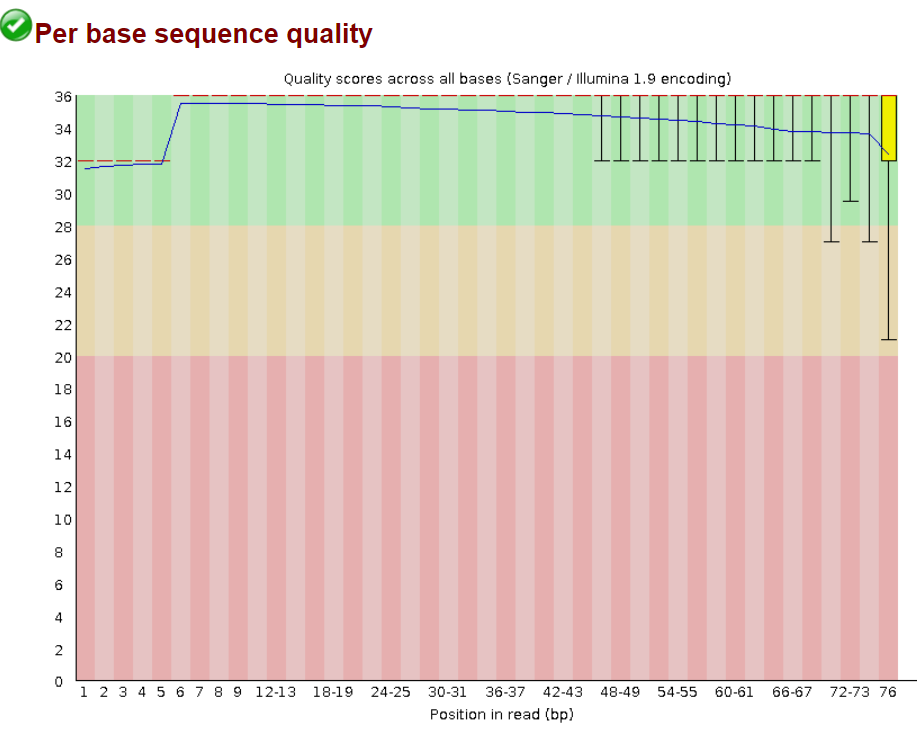

# Alignment of MYC ChIP-seq reads

In [13]:
bowtie2 -x /mnt/storage/data/resources/bowtie2/hg19 SKNSH-CMYC-ChIP-Seq.fastq -S ChIP_MYC.sam

34824400 reads; of these:
  34824400 (100.00%) were unpaired; of these:
    1569623 (4.51%) aligned 0 times
    25572349 (73.43%) aligned exactly 1 time
    7682428 (22.06%) aligned >1 times
95.49% overall alignment rate


Check first 5 lines

In [14]:
head -500 ChIP_MYC.sam | tail -5

SRR10215703.410	16	chr8	221512	42	76M	*	0	0	CATTTTTGAATTAATTTTCAAAAATTTTTGGAATATCAAAAGAATATTACATTTTCTAAATTGGTCAGTTGGGTTA	EEEEEAEEEEEEEEEEAEEEEEEEE/EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEAE/EEEE/EAAAAA	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:76	YT:Z:UU
SRR10215703.411	0	chr20	24558830	30	76M	*	0	0	GCACTTTGGGAGACCTAGGCAGGTGGATCACTTGAGGTCAGGAGTTCGAGACCAGCCTGGCTAACATGGTGAAACC	AAAAAEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEAAEEEEEEEEEEEEEEEE/EA	AS:i:0	XS:i:-5	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:76	YT:Z:UU
SRR10215703.412	16	chr7	108356497	42	75M	*	0	0	TTATATATAATTAATACTACTGCTATTTGGCTGGTGTTTCTGAGATGTGAACTGCAATGACTTCGTAAGTCCCAG	EEEEEAEEEEEAEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEAAAAA	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:75	YT:Z:UU
SRR10215703.413	0	chr13	108540501	39	76M	*	0	0	CTAGACATCCAGGTGTTTCCATACATCCTCTGAAATCTAGGCAGAGGCTCCCAAGCCTAACTCTTGCTCTCTGCAC	AAAAAEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE	AS:i:0	XS:i:-44	XN:i

Convert SAM to BAM

In [15]:
samtools view -S -b ChIP_MYC.sam > ChIP_MYC.bam

Check how many reads are in the BAM file

In [16]:
samtools view -c ChIP_MYC.bam

34824400


In [17]:
samtools sort -O bam -o ChIP_MYC.sorted.bam ChIP_MYC.bam

[bam_sort_core] merging from 10 files and 1 in-memory blocks...


In [18]:
samtools index ChIP_MYC.sorted.bam

# Alignment of the control data ("input")

In [19]:
bowtie2 -x /mnt/storage/data/resources/bowtie2/hg19 SKNSH-Input-ChIP-Seq.fastq -S SKNSH-Input-ChIP-Seq.sam

38623156 reads; of these:
  38623156 (100.00%) were unpaired; of these:
    1286382 (3.33%) aligned 0 times
    27715807 (71.76%) aligned exactly 1 time
    9620967 (24.91%) aligned >1 times
96.67% overall alignment rate


In [20]:
samtools view -S -b SKNSH-Input-ChIP-Seq.sam > SKNSH-Input-ChIP-Seq.bam

In [21]:
samtools sort -O bam -o SKNSH-Input-ChIP-Seq.sorted.bam SKNSH-Input-ChIP-Seq.bam

[bam_sort_core] merging from 11 files and 1 in-memory blocks...


In [22]:
samtools index SKNSH-Input-ChIP-Seq.sorted.bam

In [23]:
ls -la

total 42685724
drwxr-xr-x 3 r0878053 domain users        4096 Dec 31 06:14 .
drwx------ 8 r0878053 domain users         301 Dec 30 18:04 ..
-rw-r--r-- 1 r0878053 domain users  2013535022 Dec 31 04:04 ChIP_MYC.bam
-rw-r--r-- 1 r0878053 domain users  9138192316 Dec 31 03:54 ChIP_MYC.sam
-rw-r--r-- 1 r0878053 domain users  1154014274 Dec 31 04:12 ChIP_MYC.sorted.bam
-rw-r--r-- 1 r0878053 domain users     2974336 Dec 31 04:12 ChIP_MYC.sorted.bam.bai
-rw-r--r-- 1 r0878053 domain users    17110764 Dec 30 18:05 ChIP-seq-p53.ipynb
drwxr-xr-x 2 r0878053 domain users          92 Dec 31 01:48 .ipynb_checkpoints
-rw-r--r-- 1 r0878053 domain users       63187 Dec 31 06:14 MYC-ChIP-seq.ipynb
-rw-r--r-- 1 r0878053 domain users  8141584636 Dec 31 01:07 SKNSH-CMYC-ChIP-Seq.fastq
-rw-r--r-- 1 r0878053 domain users      742959 Dec 31 01:54 SKNSH-CMYC-ChIP-Seq_fastqc.html
-rw-r--r-- 1 r0878053 domain users      465531 Dec 31 01:54 SKNSH-CMYC-ChIP-Seq_fastqc.zip
-rw-r--r-- 1 r0878053 domain users  22094826

# Genome-wide coverage plots

I took the effectiveGenomeSize for hg19 from https://deeptools.readthedocs.io/en/latest/content/feature/effectiveGenomeSize.html

In [25]:
bamCoverage -b ChIP_MYC.sorted.bam --normalizeUsing RPGC --effectiveGenomeSize 2864785220 -o ChIP_MYC.bw

normalization: 1x (effective genome size 2864785220)
bamFilesList: ['ChIP_MYC.sorted.bam']
binLength: 50
numberOfSamples: None
blackListFileName: None
skipZeroOverZero: False
bed_and_bin: False
defaultFragmentLength: read length
numberOfProcessors: 1
verbose: False
region: None
bedFile: None
minMappingQuality: None
ignoreDuplicates: False
chrsToSkip: []
stepSize: 50
center_read: False
samFlag_include: None
samFlag_exclude: None
minFragmentLength: 0
maxFragmentLength: 0
zerosToNans: False
smoothLength: None
save_data: False
out_file_for_raw_data: None
maxPairedFragmentLength: 1000


# Check of BAM and BW file in IGV 

NRF1 is known to be a taget gene for MYC (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2258436/).
Here, we can indeed see a peak just before the NRF1 gene.
We can observe the shift in reads between positive and negative strand (red and blue) which is characteristic for a correct peak.

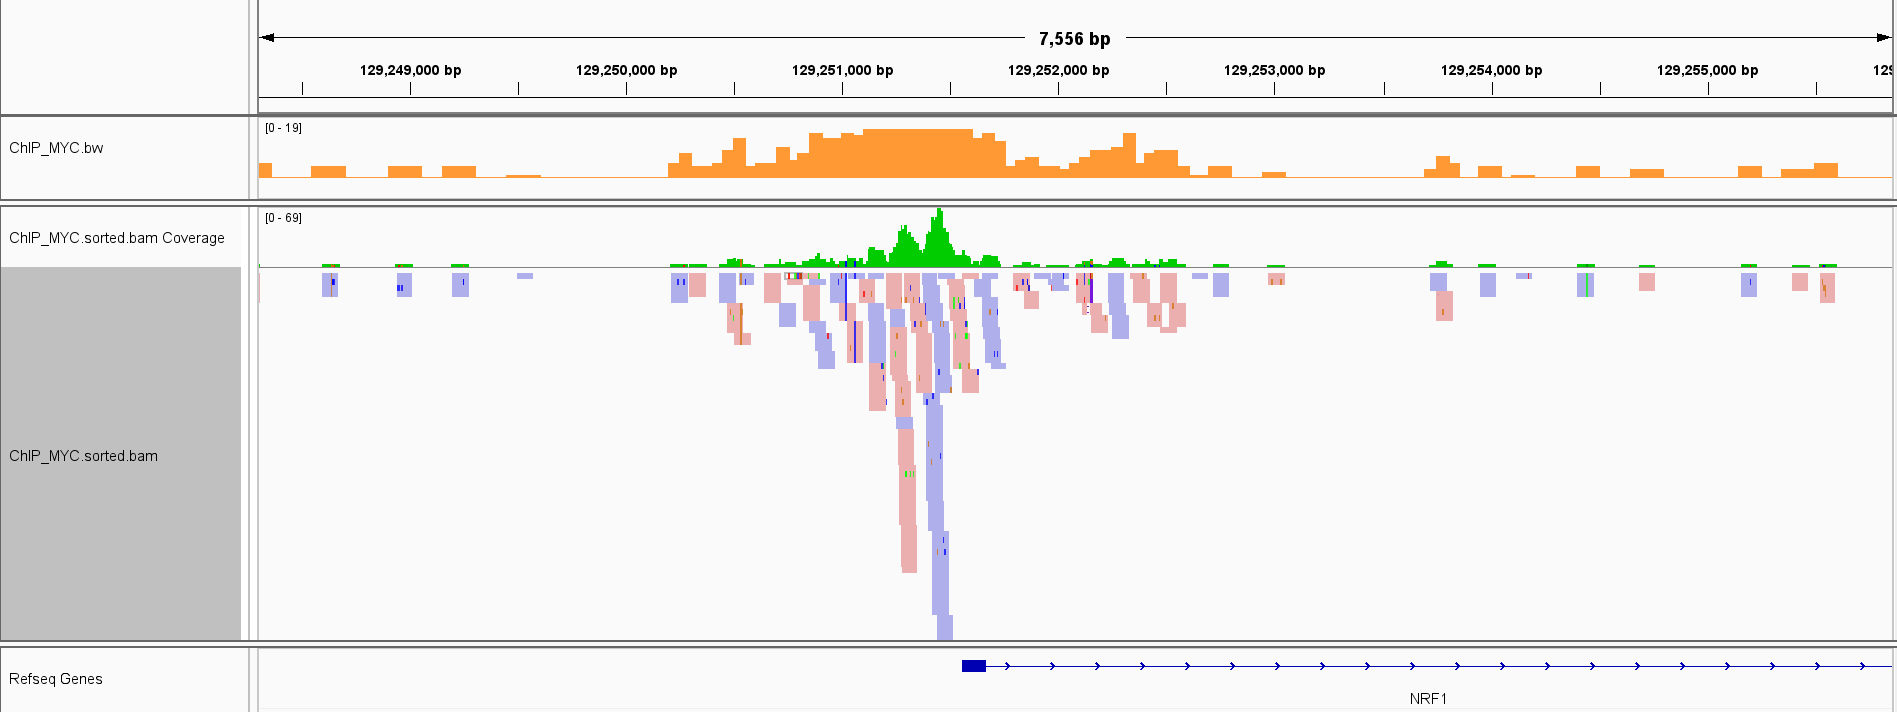

# Peak calling with MACS2

In [26]:
macs2

usage: macs2 [-h] [--version]
             {callpeak,bdgpeakcall,bdgbroadcall,bdgcmp,bdgopt,cmbreps,bdgdiff,filterdup,predictd,pileup,randsample,refinepeak}
             ...
macs2: error: the following arguments are required: subcommand


: 2

In [27]:
macs2 callpeak -t ChIP_MYC.sorted.bam -c SKNSH-Input-ChIP-Seq.sorted.bam -n MYC -g 2864785220 -q 0.05

INFO  @ Sat, 31 Dec 2022 14:23:35: 
# Command line: callpeak -t ChIP_MYC.sorted.bam -c SKNSH-Input-ChIP-Seq.sorted.bam -n MYC -g 2864785220 -q 0.05
# ARGUMENTS LIST:
# name = MYC
# format = AUTO
# ChIP-seq file = ['ChIP_MYC.sorted.bam']
# control file = ['SKNSH-Input-ChIP-Seq.sorted.bam']
# effective genome size = 2.86e+09
# band width = 300
# model fold = [5, 50]
# qvalue cutoff = 5.00e-02
# The maximum gap between significant sites is assigned as the read length/tag size.
# The minimum length of peaks is assigned as the predicted fragment length "d".
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 1000 bps and 10000 bps
# Broad region calling is off
# Paired-End mode is off
 
INFO  @ Sat, 31 Dec 2022 14:23:35: #1 read tag files... 
INFO  @ Sat, 31 Dec 2022 14:23:35: #1 read treatment tags... 
INFO  @ Sat, 31 Dec 2022 14:23:35: Detected format is: BAM 
INFO  @ Sat, 31 Dec 2022 14:23:35: * Input file is gzipped. 
INFO  @ Sat, 31 Dec 

In [28]:
ls -la

total 25987824
drwxr-xr-x 3 r0878053 domain users        4096 Dec 31 18:18 .
drwx------ 8 r0878053 domain users         301 Dec 30 18:04 ..
-rw-r--r-- 1 r0878053 domain users  2013535022 Dec 31 04:04 ChIP_MYC.bam
-rw-r--r-- 1 r0878053 domain users    71535536 Dec 31 14:20 ChIP_MYC.bw
-rw-r--r-- 1 r0878053 domain users  9138192316 Dec 31 03:54 ChIP_MYC.sam
-rw-r--r-- 1 r0878053 domain users  1154014274 Dec 31 04:12 ChIP_MYC.sorted.bam
-rw-r--r-- 1 r0878053 domain users     2974336 Dec 31 04:12 ChIP_MYC.sorted.bam.bai
-rw-r--r-- 1 r0878053 domain users    17110764 Dec 30 18:05 ChIP-seq-p53.ipynb
drwxr-xr-x 2 r0878053 domain users          92 Dec 31 01:48 .ipynb_checkpoints
-rw-r--r-- 1 r0878053 domain users       76913 Dec 31 18:18 MYC-ChIP-seq.ipynb
-rw-r--r-- 1 r0878053 domain users       99021 Dec 31 14:26 MYC_model.r
-rw-r--r-- 1 r0878053 domain users     1587435 Dec 31 18:10 MYC_peaks.narrowPeak
-rw-r--r-- 1 r0878053 domain users     1801124 Dec 31 18:10 MYC_peaks.xls
-rw-r--r-- 1 r

How many peak are called?

In [29]:
cat MYC_peaks.narrowPeak | wc -l

21796


How does the narrowPeak file looks like?

In [33]:
cat MYC_peaks.narrowPeak | head

chr1	12201	12444	MYC_peak_1	20	.	3.10292	4.52097	2.08634	192
chr1	15217	15664	MYC_peak_2	70	.	5.30629	9.96889	7.08046	316
chr1	23467	23692	MYC_peak_3	42	.	4.68583	6.98269	4.27588	158
chr1	28664	29889	MYC_peak_4	1247	.	32.62536	129.47752	124.78155	553
chr1	135521	135816	MYC_peak_5	44	.	4.63274	7.18161	4.45784	188
chr1	154937	155162	MYC_peak_6	23	.	3.87747	4.80048	2.31410	220
chr1	326312	326550	MYC_peak_7	51	.	4.90547	7.93540	5.16049	204
chr1	327020	327248	MYC_peak_8	51	.	5.08820	7.92664	5.15209	137
chr1	327550	327848	MYC_peak_9	39	.	4.64226	6.64153	3.96824	203
chr1	433508	433757	MYC_peak_10	50	.	5.56359	7.85684	5.08813	107
cat: write error: Broken pipe


Now, let's go back to NRF1 gene and see if the peak is called.

I also included the input file to have a comparison. We can see that there is no peak in the input file, which is good.

##### Tracks legend

Orange: Genome-wide coverage

Green: BAM file

Pink: Input file 

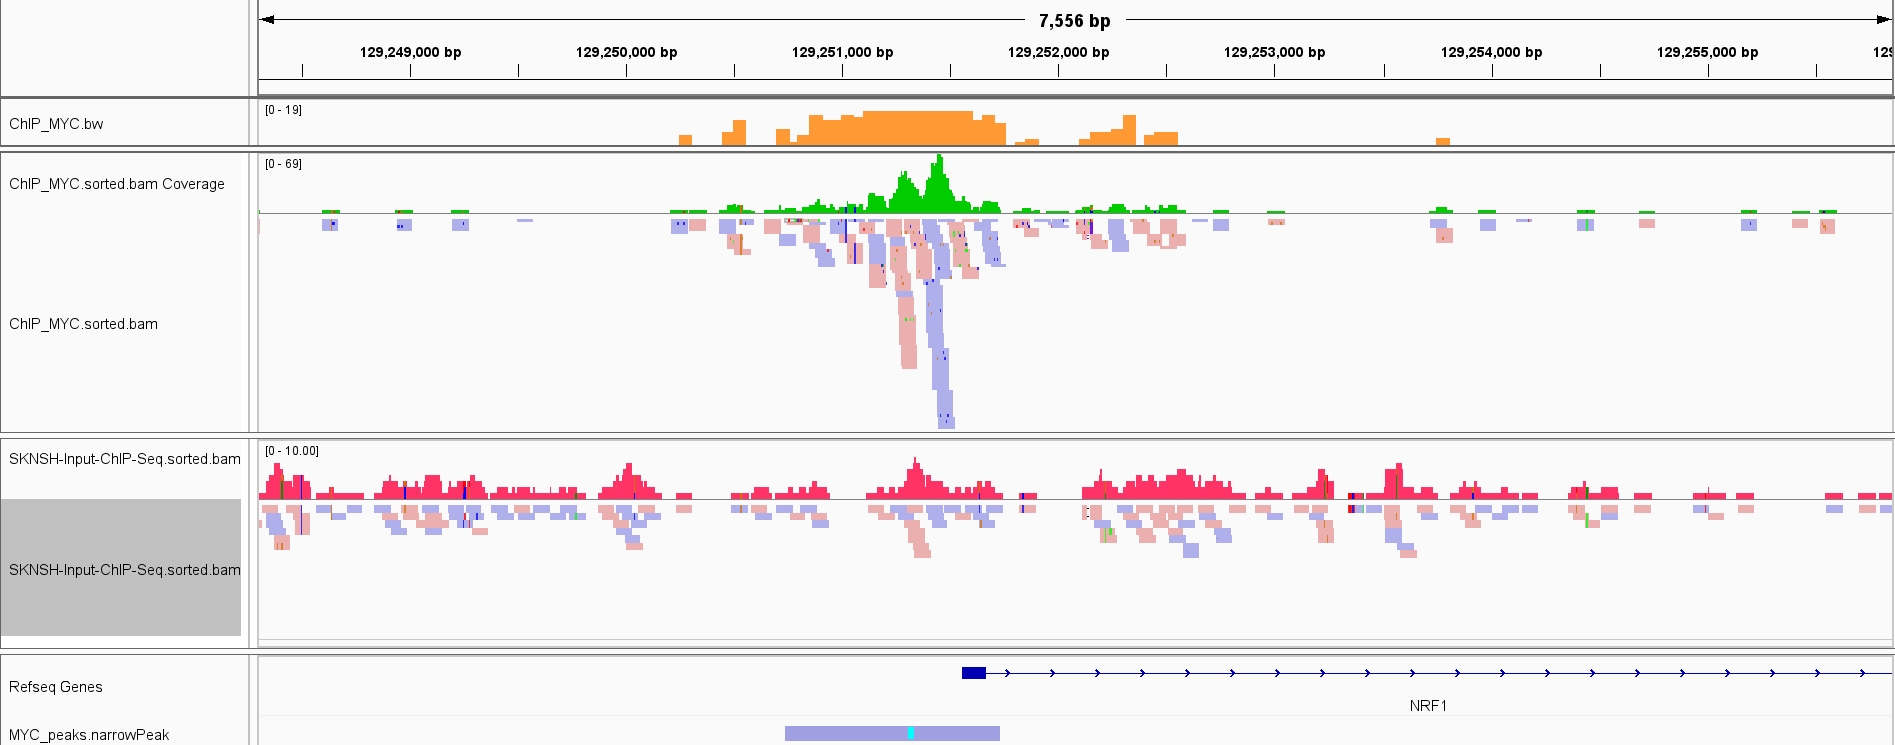

In [43]:
cat MYC_peaks.narrowPeak | sort -k9 -g -r | head -1000

chr12	6961108	6962240	MYC_peak_4038	5757	.	128.39314	585.25635	575.76483	576
chr20	62586794	62588672	MYC_peak_13058	5696	.	128.81056	578.00342	569.62585	1090
chr7_gl000195_random	30061	33774	MYC_peak_18928	5287	.	48.36125	536.10876	528.78461	1901
chrUn_gl000220	6800	8320	MYC_peak_20948	5117	.	45.11912	518.83307	511.73953	862
chr17_gl000205_random	84454	88236	MYC_peak_9167	4887	.	40.15060	495.25220	488.79132	2993
chr19	4791261	4793137	MYC_peak_9759	4776	.	96.83276	483.99890	477.69775	347
chr7	63385512	63387403	MYC_peak_18148	4759	.	96.70782	482.25204	475.96359	1204
chr1	2456864	2458114	MYC_peak_107	4541	.	115.83941	460.32788	454.18585	776
chr17	17494473	17495645	MYC_peak_8084	4505	.	114.61642	456.69781	450.57498	607
chr3	50329119	50330339	MYC_peak_14171	4492	.	86.68110	455.38474	449.27127	830
chr19	10216778	10217882	MYC_peak_9865	4057	.	101.54358	411.57260	405.70126	345
chr12	54120880	54121818	MYC_peak_4335	3911	.	94.89045	396.97852	391.16309	505
chr7	807185	809001	MYC_peak_17748	3793	.

After sorting, the corresponding first peak on chr12 is visualised in IGV below.

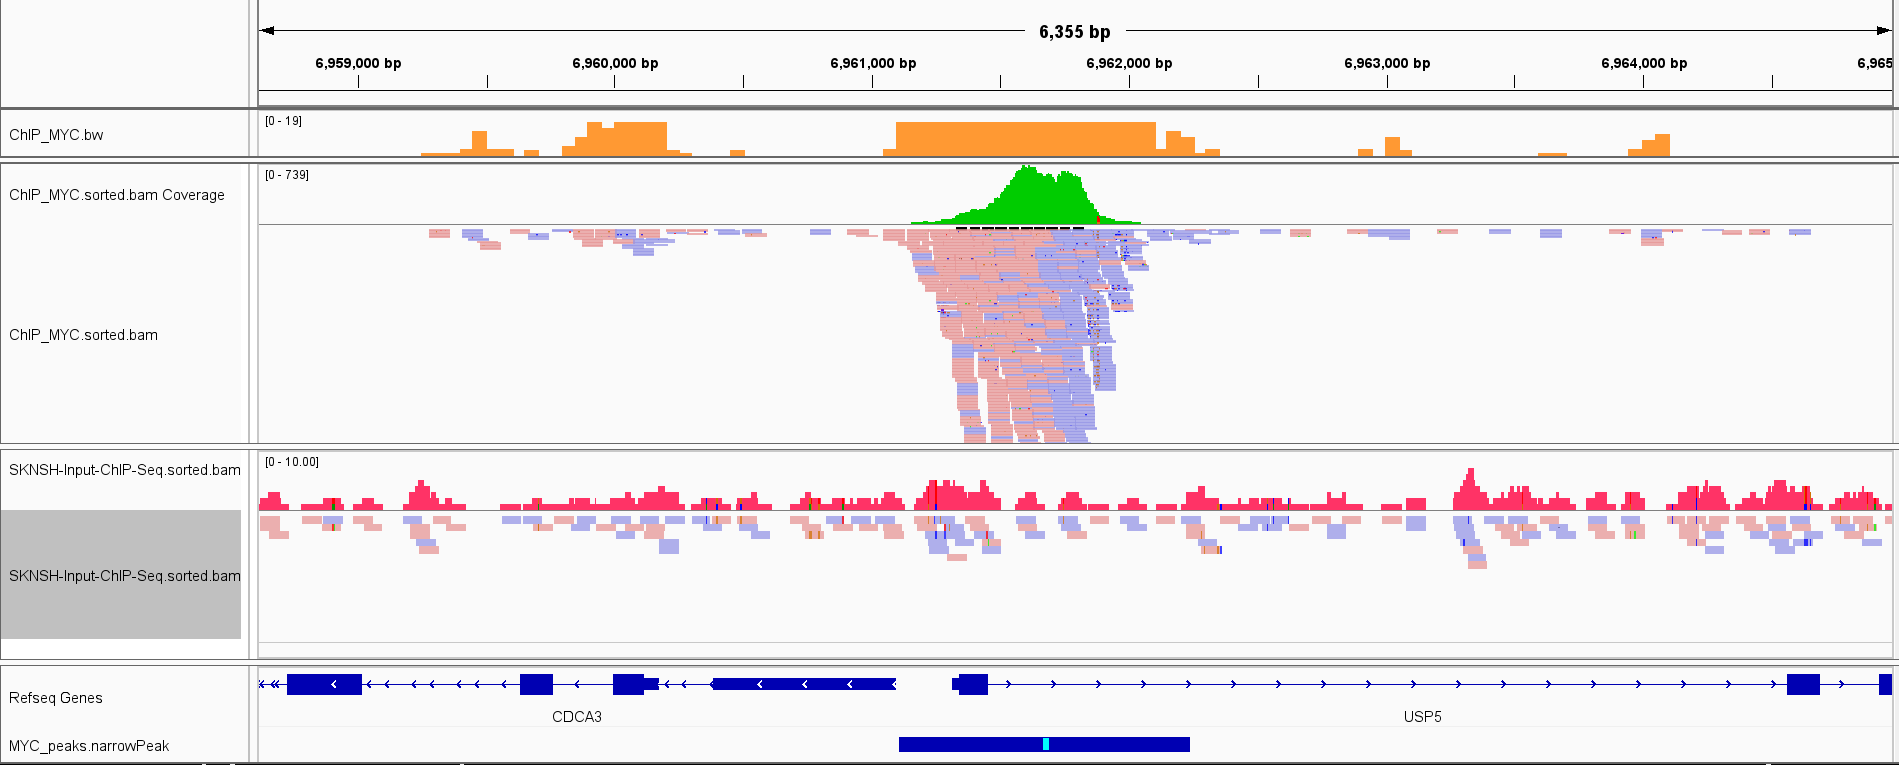

In [30]:
cat MYC_peaks.narrowPeak | cut -f 1-3 > MYC_peaks.bed

In [31]:
computeMatrix reference-point \
    -S ChIP_MYC.bw \
    -R MYC_peaks.bed \
    --referencePoint center \
    -a 2000 \
    -b 2000 \
    --binSize 5 \
    -out ChIP_MYC.tab.gz

In [32]:
plotHeatmap \
    -m ChIP_MYC.tab.gz \
    -out MYC_peaks5.png \
    --heatmapHeight 15  \
    --refPointLabel peak.center \
    --regionsLabel peaks \
    --plotTitle 'ChIP-seq signal'

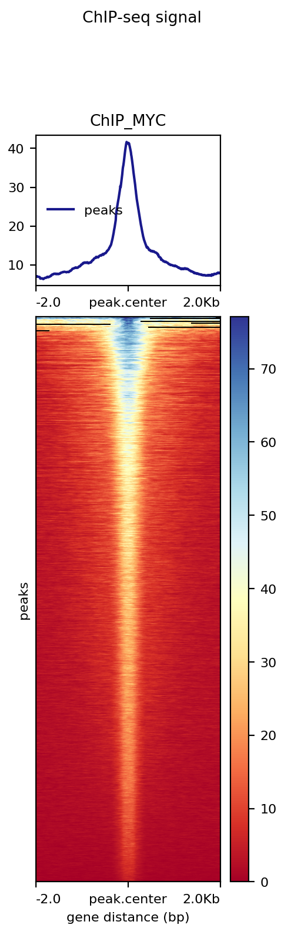

## Motif Analysis

### De novo motif discovery

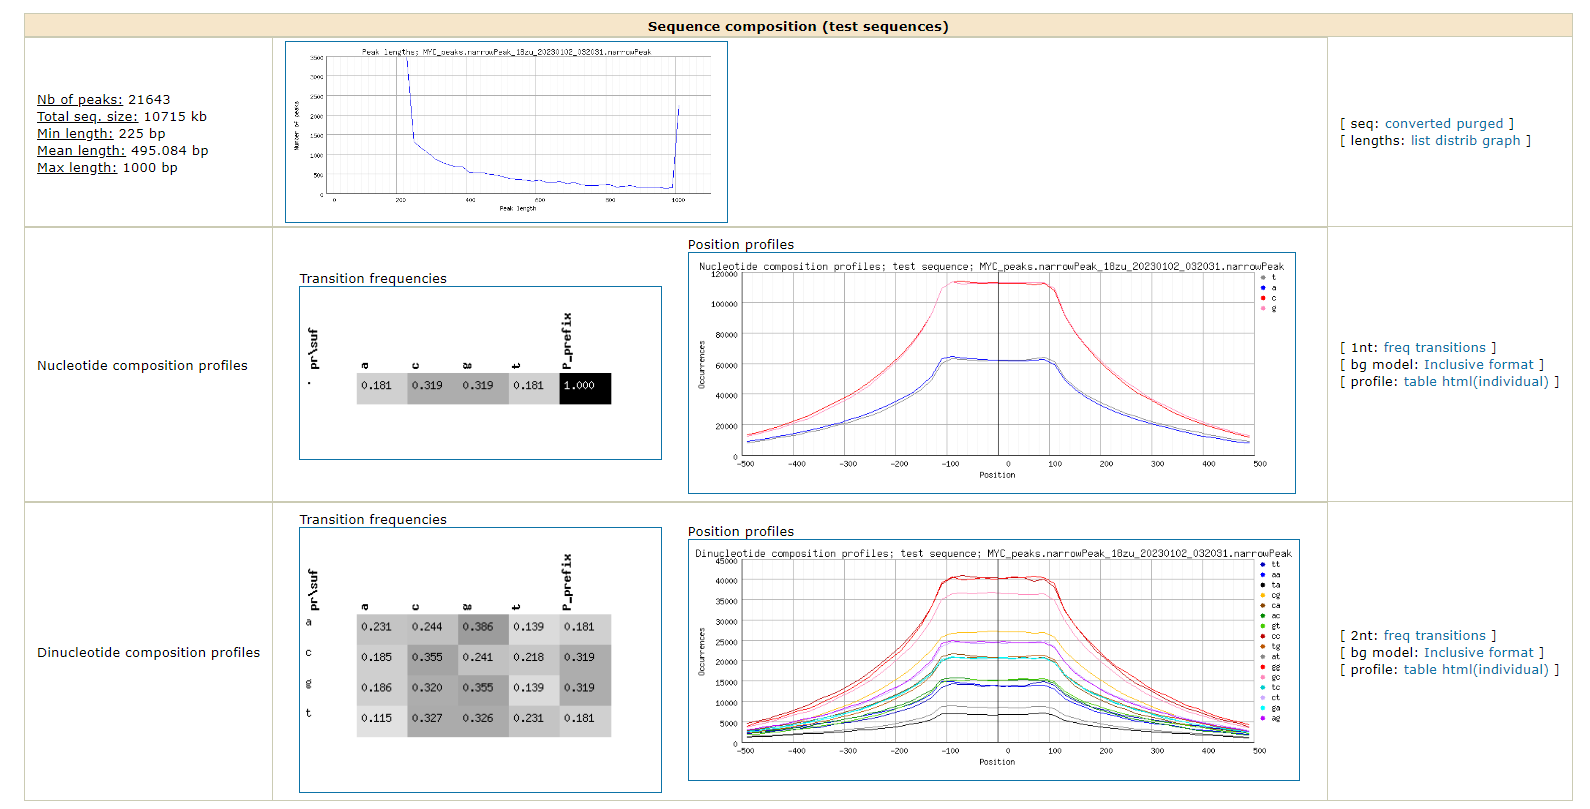

Most of the matches occur in the center of the peak, which is good, but the peaks are quite wide.

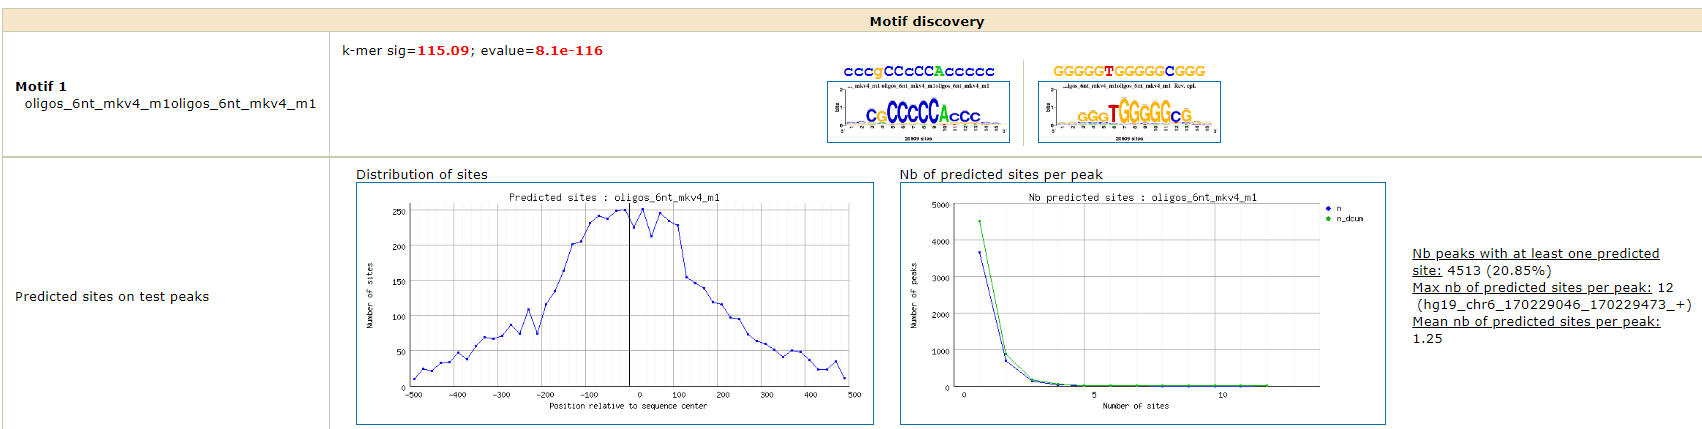

### Top 5 motifs

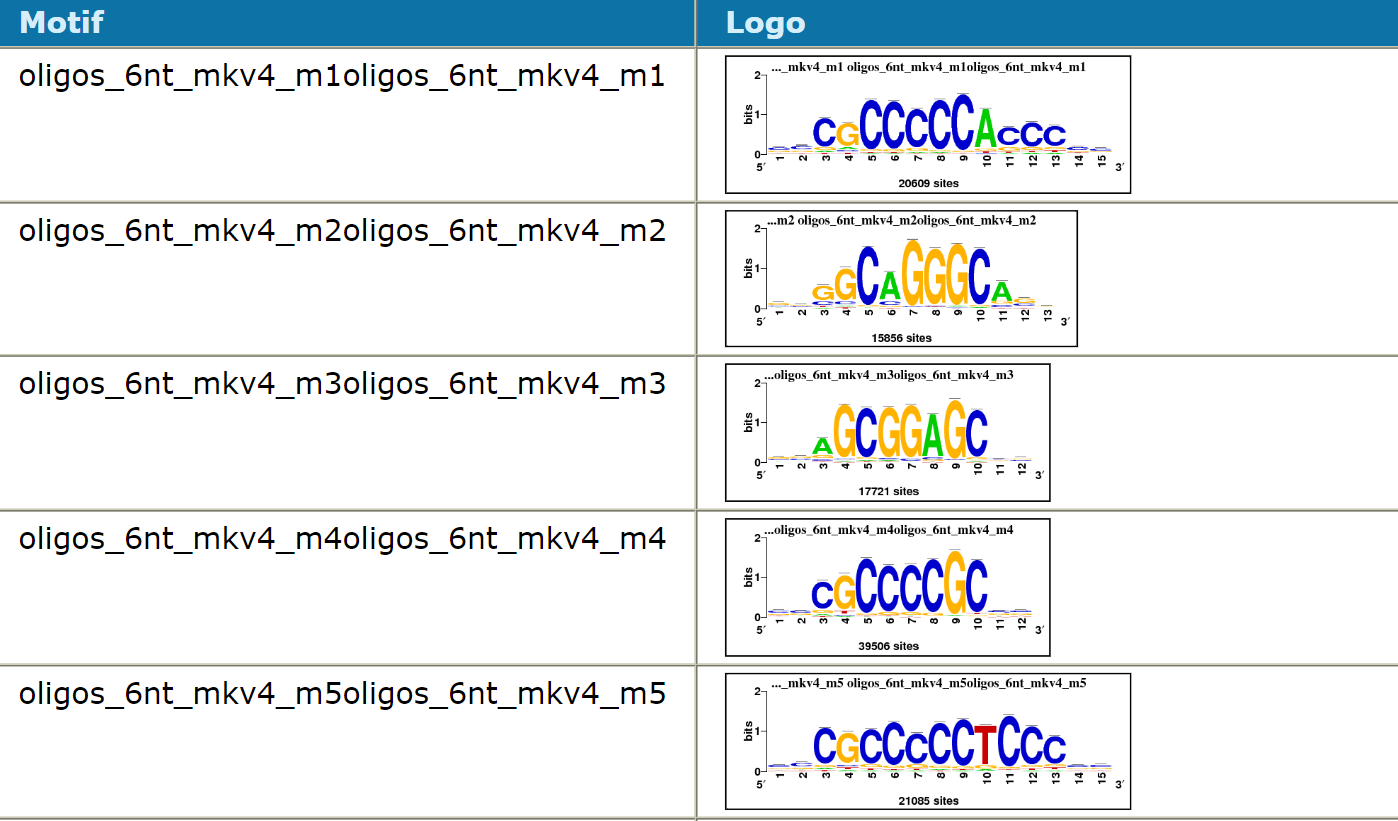

### Create a BED file with only the DIRECT peaks = peaks with the first motif

In [47]:
grep -w "oligos_6nt_mkv4_m1oligos_6nt_mkv4_m1" peak-motifs_all_motifs_seqcoord.tab > oligos_6nt_mkv4_m1oligos_6nt_mkv4_m1.tab

In [48]:
cat oligos_6nt_mkv4_m1oligos_6nt_mkv4_m1.tab | head

hg19_chr1_28665_29889_+	site	oligos_6nt_mkv4_m1oligos_6nt_mkv4_m1	D	113	127	GCCGCCCCCAGTCCG	8.2
hg19_chr1_28665_29889_+	site	oligos_6nt_mkv4_m1oligos_6nt_mkv4_m1	D	315	329	GCCGCCCCTACCCGT	8.0
hg19_chr1_713419_714793_+	site	oligos_6nt_mkv4_m1oligos_6nt_mkv4_m1	R	31	45	GCAGCCCCCACCGCG	7.7
hg19_chr1_761998_763524_+	site	oligos_6nt_mkv4_m1oligos_6nt_mkv4_m1	R	-220	-206	ATCGTCCCCACCCTC	7.9
hg19_chr1_876574_877166_+	site	oligos_6nt_mkv4_m1oligos_6nt_mkv4_m1	D	-144	-130	GCCGCCCGCACCCCC	9.0
hg19_chr1_1051161_1051911_+	site	oligos_6nt_mkv4_m1oligos_6nt_mkv4_m1	D	-119	-105	CCTGCCCCCAGCCCC	7.7
hg19_chr1_1166510_1167496_+	site	oligos_6nt_mkv4_m1oligos_6nt_mkv4_m1	R	362	376	ACCGCCCCCGCCCGC	8.3
hg19_chr1_1209065_1209996_+	site	oligos_6nt_mkv4_m1oligos_6nt_mkv4_m1	R	-182	-168	CCATCCCCCACCCCG	8.1
hg19_chr1_1239755_1240454_+	site	oligos_6nt_mkv4_m1oligos_6nt_mkv4_m1	R	-135	-121	ACTGCCCCCACCCTG	8.2
hg19_chr1_1289755_1290491_+	site	oligos_6nt_mkv4_m1oligos_6nt_mkv4_m1	R	-221	-207	GCCGCCCCGACCCCG	8.6
cat:

In [51]:
cat oligos_6nt_mkv4_m1oligos_6nt_mkv4_m1.tab | grep -v ";" | grep -v '#' | cut -f 1 | tr "_" "\t" | cut -f 2-4 | head

chr1	28665	29889
chr1	28665	29889
chr1	713419	714793
chr1	761998	763524
chr1	876574	877166
chr1	1051161	1051911
chr1	1166510	1167496
chr1	1209065	1209996
chr1	1239755	1240454
chr1	1289755	1290491
cut: write error: Broken pipe


In [52]:
cat oligos_6nt_mkv4_m1oligos_6nt_mkv4_m1.tab | grep -v ";" | grep -v '#' | cut -f 1 | tr "_" "\t" | cut -f 2-4 > MYC-first.bed

In [53]:
cat MYC-first-motif.bed | head

chr1	28665	29889
chr1	28665	29889
chr1	713419	714793
chr1	761998	763524
chr1	876574	877166
chr1	1051161	1051911
chr1	1166510	1167496
chr1	1209065	1209996
chr1	1239755	1240454
chr1	1289755	1290491
cat: write error: Broken pipe


### PWM and track enrichment


Next, I proceeded with PWM and track enrichment analysis using i-cisTarget (https://gbiomed.kuleuven.be/apps/lcb/i-cisTarget/index.php).
The full report with results can be viewed here: https://gbiomed.kuleuven.be/apps/lcb/i-cisTarget/reports/8a65b889d8fd6a90960093827b35c4e8ad5aa9a5/report.html

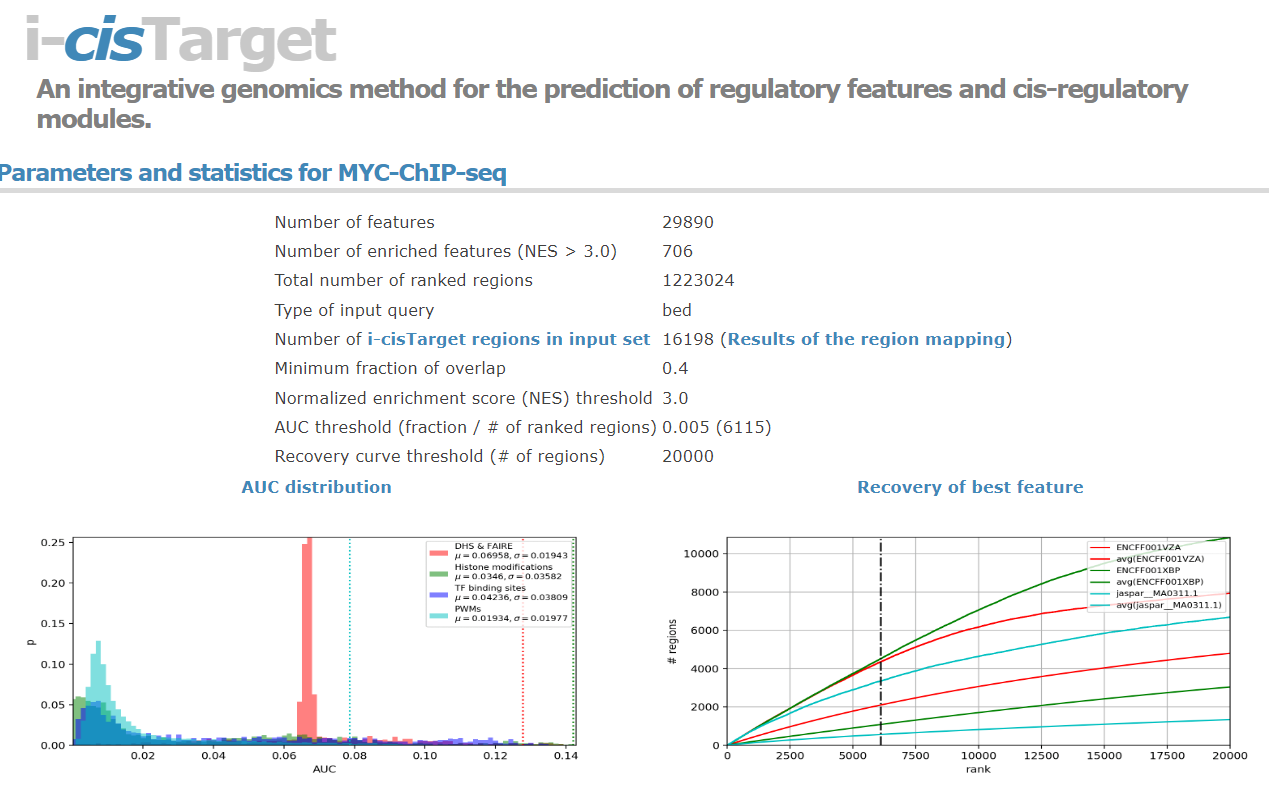

Here are the top 7 motifs discovered using i-cisTarget. Unfortunately, the NES scores are  not high with less than 5 for the highest scored motif. Also, no motifs are directly correlated to MYC.

We see that around 6700 peaks are in the leading edge (out of almost 22000), so about 1/3 of the input peaks contain a good match of the first two motifs. 

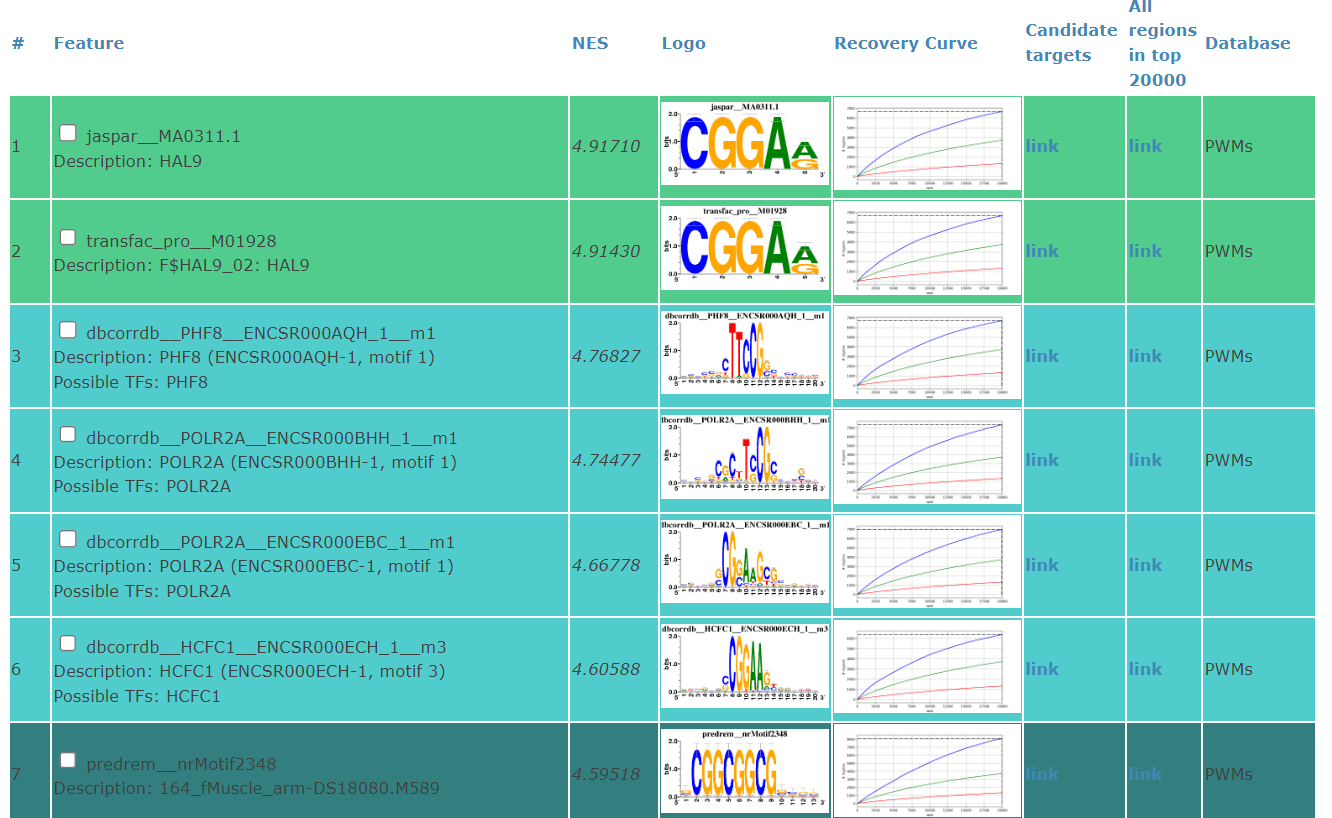

### Leading edge in i-cisTarget for the first motif = directly bound regions

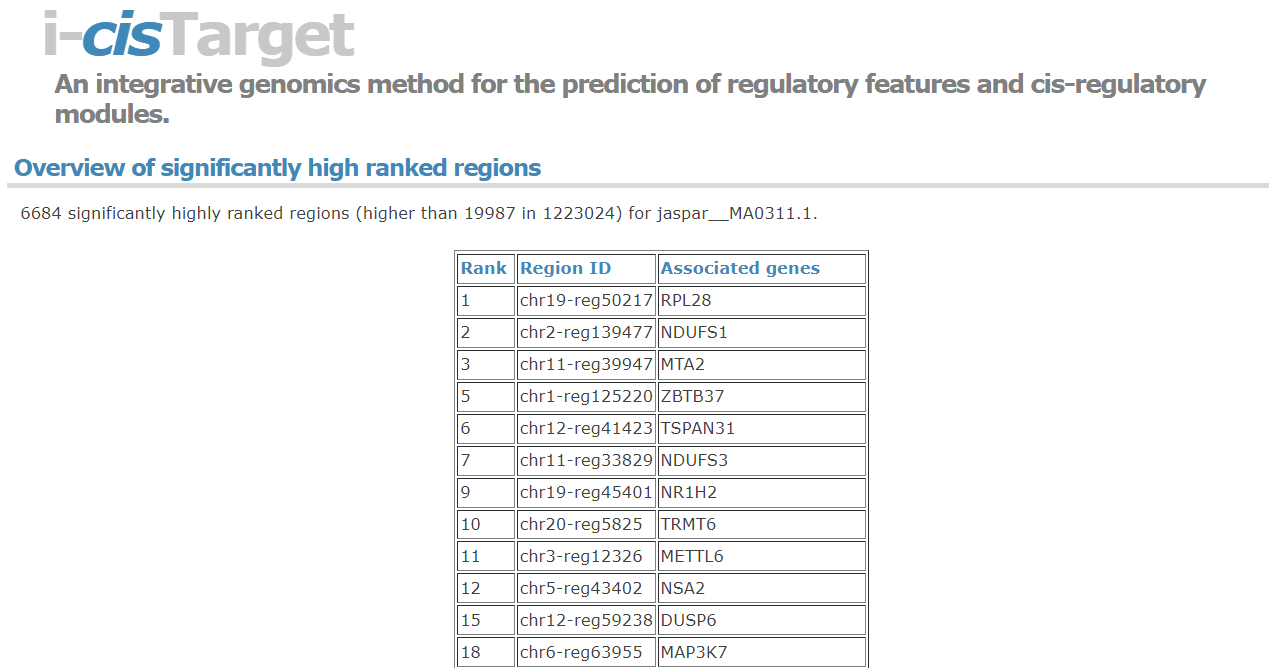

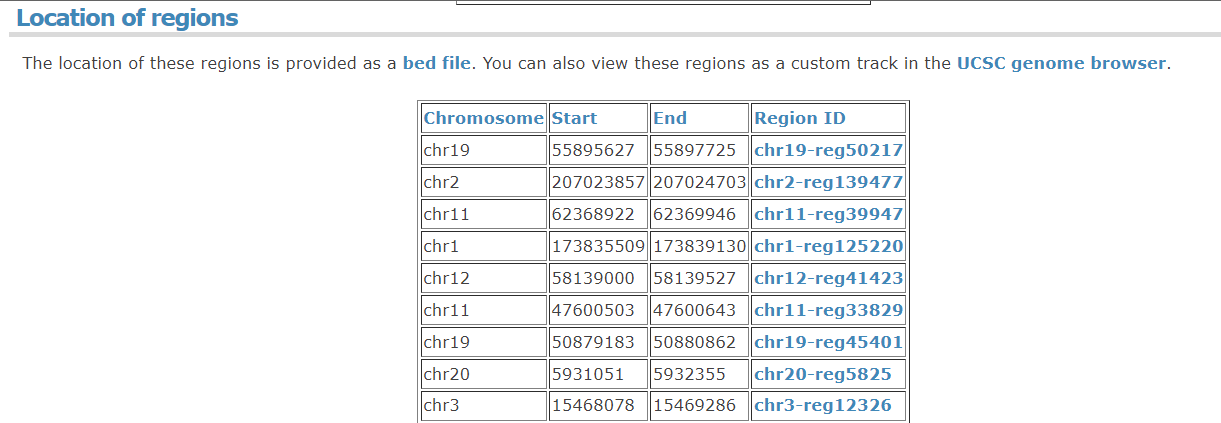

In [55]:
cat jaspar__MA0311.1.targets.bed | head

track name=jaspar__MA0311.1_candidate_targets description="" useScore=1
chr1	155826327	155827473	chr1-reg110556
chr17	73975431	73976245	chr17-reg67021
chr10	88515314	88517610	chr10-reg59520
chr1	235490234	235493195	chr1-reg173886
chr15	44829625	44830525	chr15-reg16353
chr17	37617237	37618324	chr17-reg32502
chr22	24814725	24817155	chr22-reg7517
chr1	8762825	8764013	chr1-reg9125
chr2	203101900	203103162	chr2-reg136323
cat: write error: Broken pipe


In [56]:
cat jaspar__MA0311.1.targets.bed | wc -l

6684


### Link Peaks to Genes

Here are some results for all MYC narrow peaks done in GREAT (http://great.stanford.edu/public/html/index.php):

Unfortunately, there is no pathway enriched...

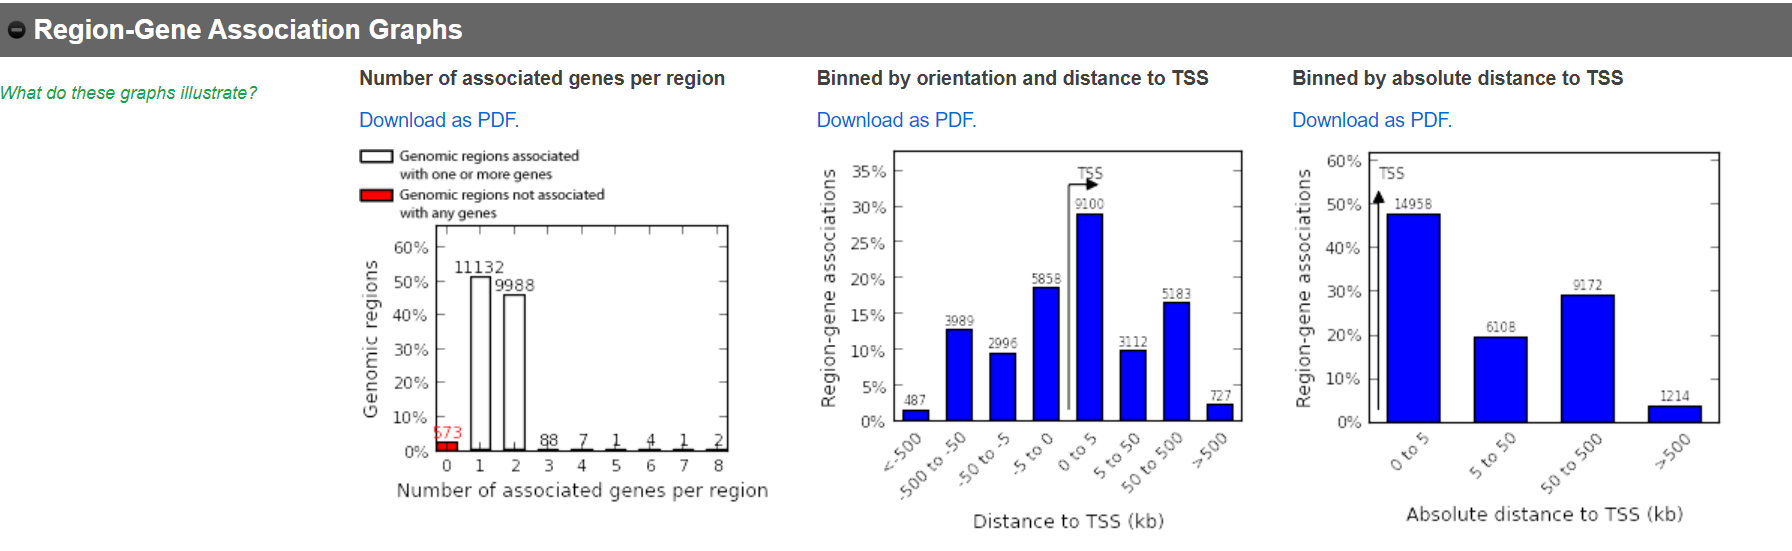

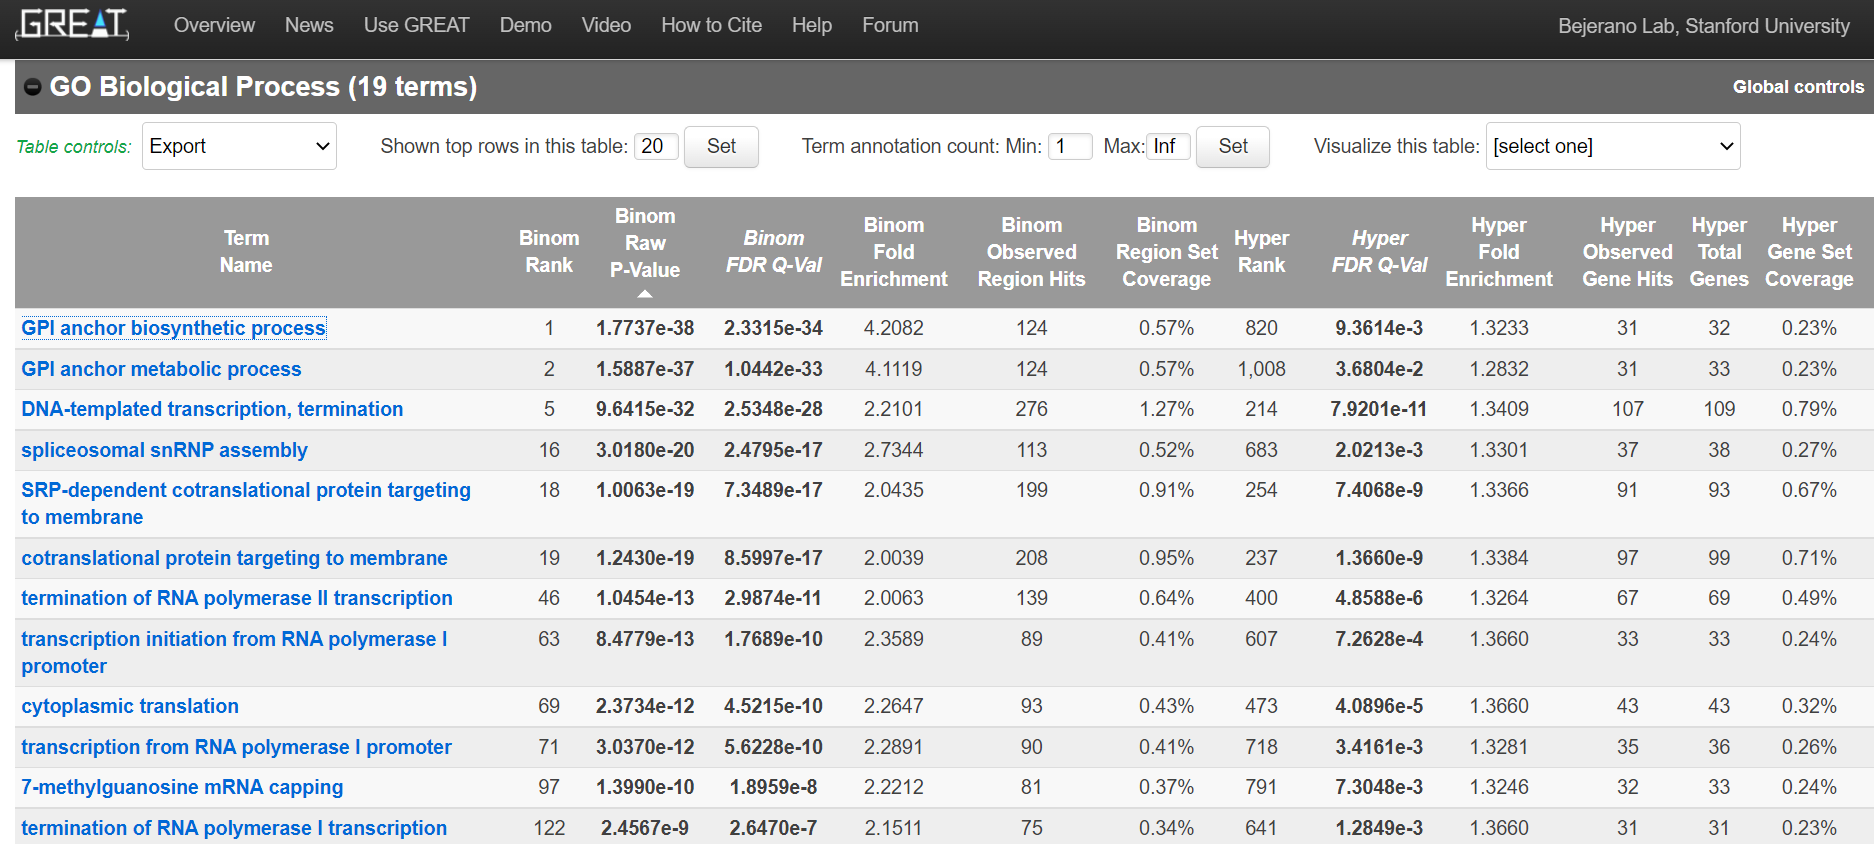

And here we can see genes and peaks associated with the GPI anchor biosynthetic process:

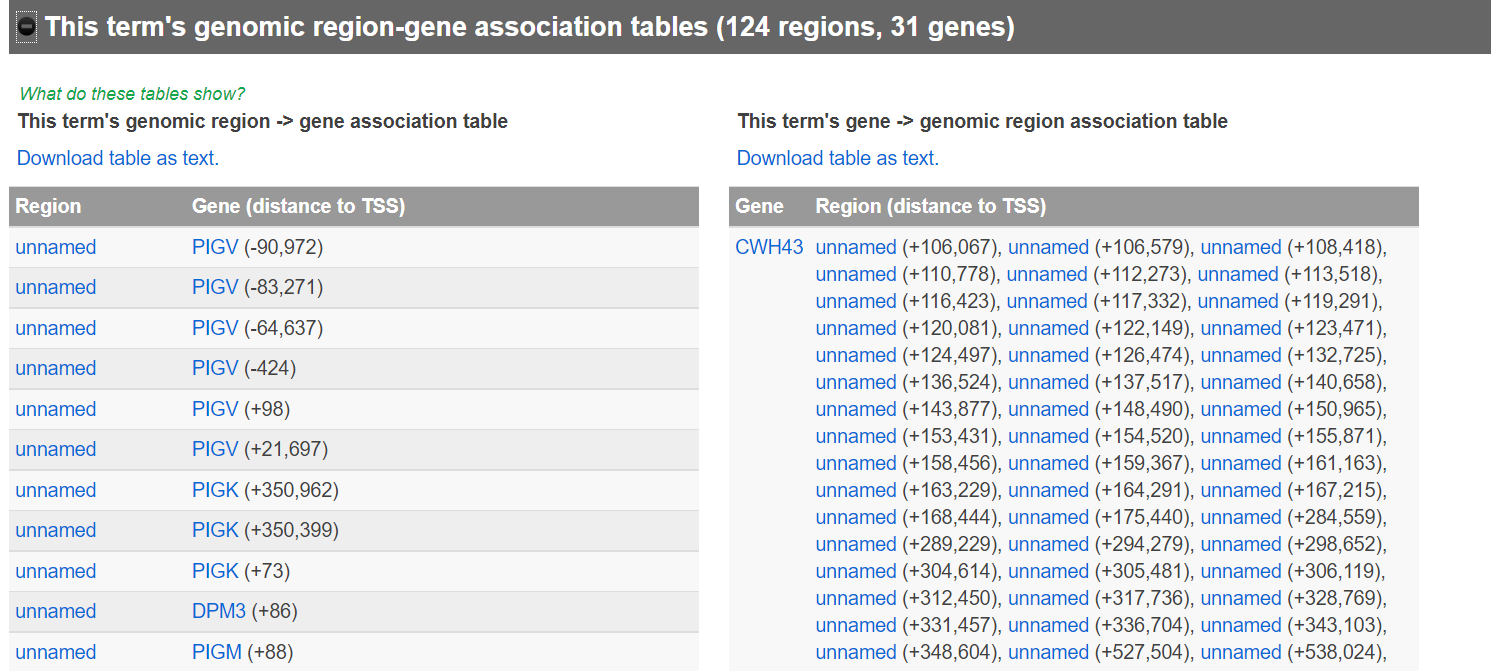

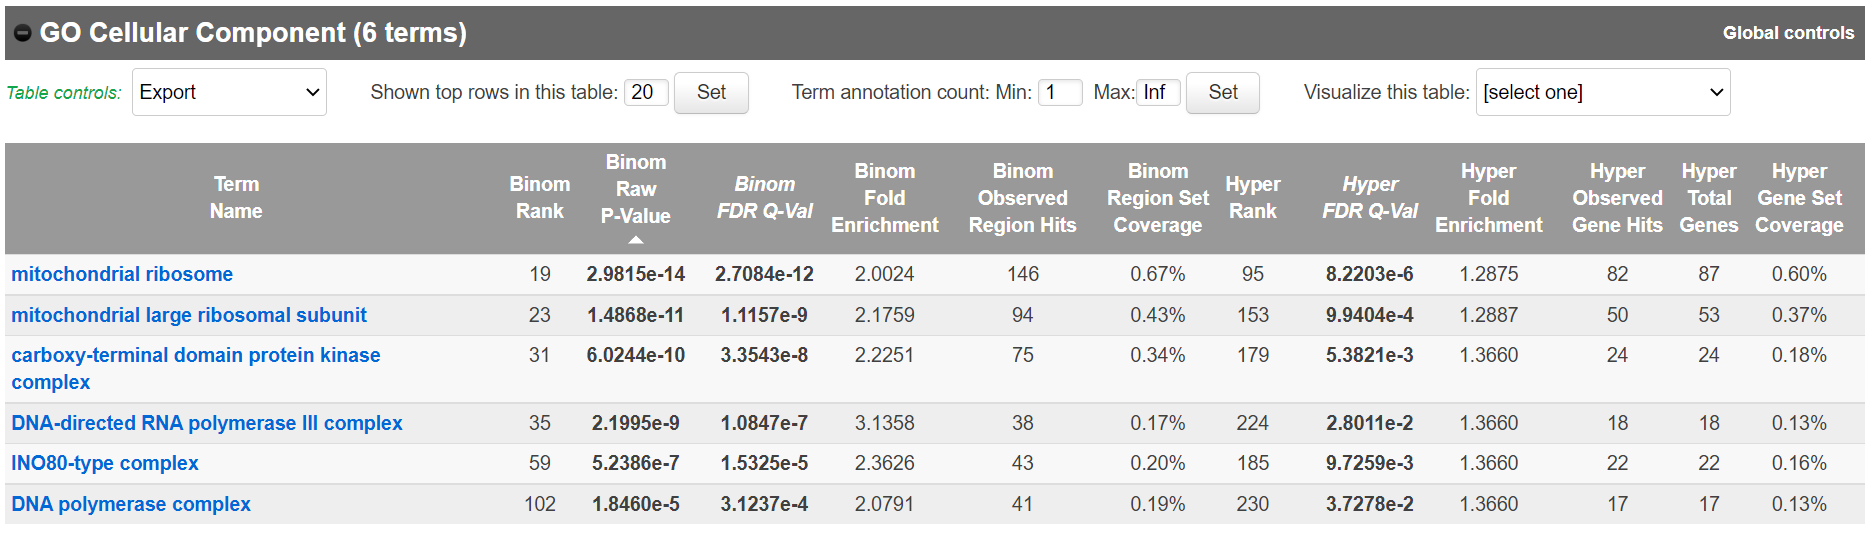

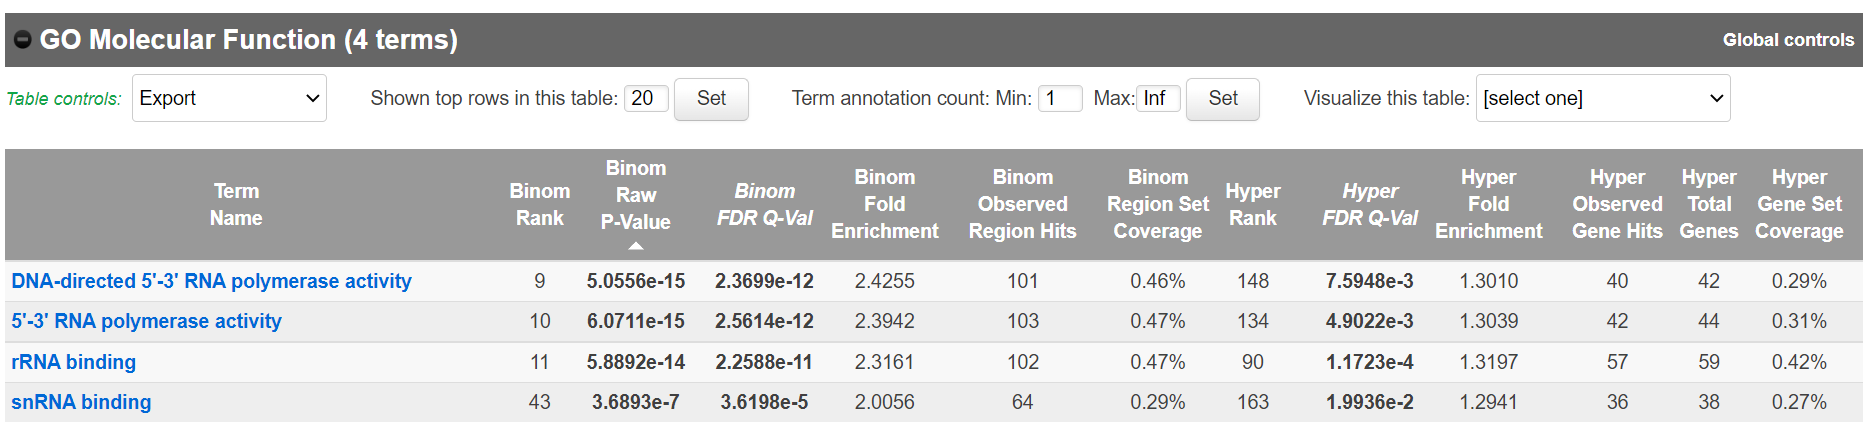

Then I downloaded a list of putative target genes from GREAT:

In [57]:
head hg19-all-gene.txt

# GREAT version 4.0.4	Species assembly: hg19	Association rule: Basal+extension: 5000 bp upstream, 1000 bp downstream, 1000000 bp max extension, curated regulatory domains included
A1BG	unnamed (-2510), unnamed (+6345)
A1CF	unnamed (-105770), unnamed (-105377), unnamed (+145648), unnamed (+225755)
A2ML1	unnamed (-26590)
A3GALT2	unnamed (-29192), unnamed (-28181), unnamed (+45480)
AAAS	unnamed (-3567), unnamed (+96)
AACS	unnamed (-15231), unnamed (-154), unnamed (+647)
AADACL4	unnamed (-1877)
AADAT	unnamed (+359)
AAED1	unnamed (-51711), unnamed (+499)


In [58]:
cat hg19-all-gene.txt | cut -f 1 | grep -v '#' | wc -l

13580


In [59]:
cat hg19-all-gene.txt | cut -f 1 | grep -v '#' | grep NRF1

LONRF1
NRF1
ZNRF1


In [60]:
cat hg19-all-gene.txt | cut -f 1 | grep -v '#' > myc-targets-GREAT.txt

## Comparison of predicted targets with functional associations to MYC

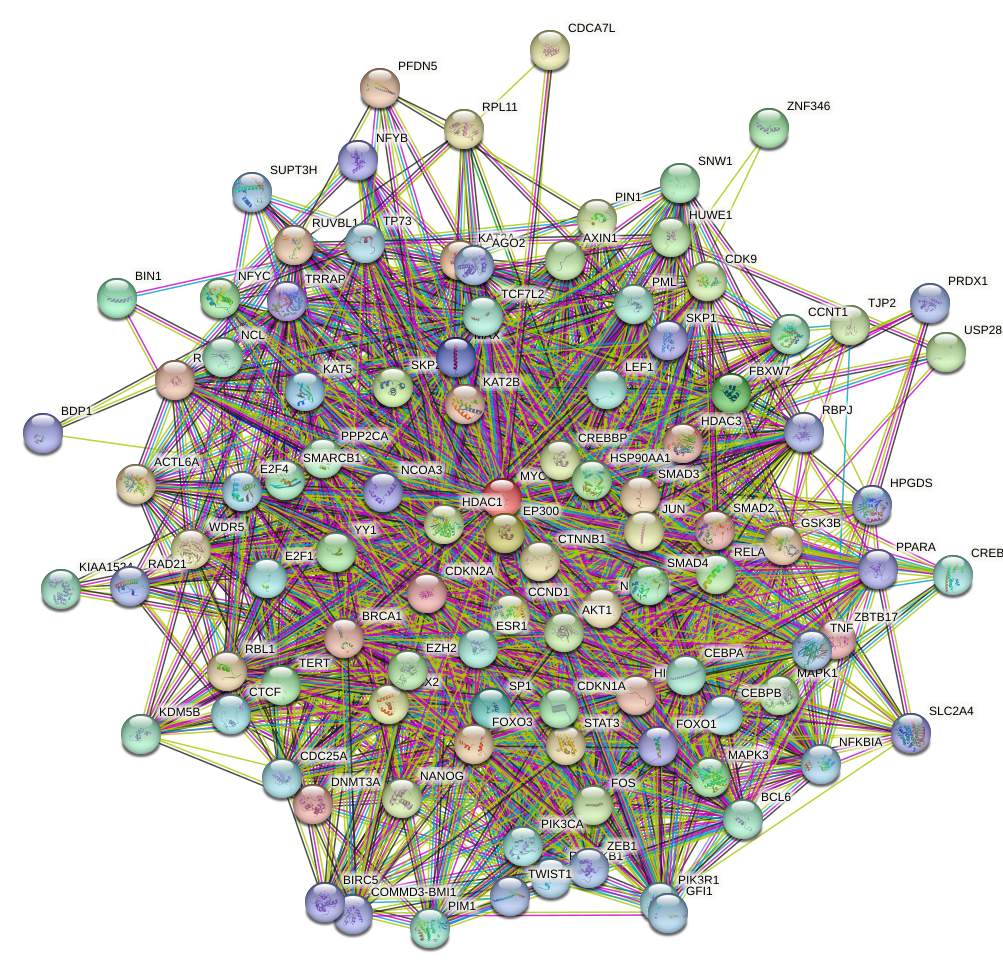

In [69]:
cat string_protein_annotations.tsv | cut -f1 | head

#node
ACTL6A
AGO2
AKT1
AXIN1
BCL6
BDP1
BIN1
BIRC5
BRCA1


In [70]:
cat string_protein_annotations.tsv | cut -f 1 | grep -v '#' > MYC-string-top100.txt

In [72]:
list=`cat MYC-string-top100.txt`

In [74]:
for i in $list; do grep -w $i myc-targets-GREAT.txt; done

ACTL6A
AGO2
AXIN1
BCL6
BDP1
BIN1
BIRC5
BRCA1
CCND1
CCNT1
CDC25A
CDCA7L
CDK9
CDKN2A
CEBPA
CEBPB
COMMD3-BMI1
CREB3
CREBBP
CTCF
CTNNB1
DNMT3A
E2F1
E2F4
EP300
ESR1
EZH2
FBXW7
FOS
FOXO1
FOXO3
GFI1
GSK3B
HDAC3
HIF1A
HSP90AA1
HUWE1
JUN
KAT2A
KAT2B
KAT5
KDM5B
KIAA1524
LEF1
MAPK1
MAPK3
MAX
MYC
NCL
NCOA3
NFKBIA
NFYB
NFYC
NOTCH1
PFDN5
PIK3CA
PIK3R1
PIM1
PIN1
PML
PPARA
PPP2CA
PRDX1
RAD21
RBL1
RBPJ
RELA
RPL11
RPS6KB1
RUVBL1
RUVBL2
SKP1
SKP2
SLC2A4
SMAD2
SMAD3
SMAD4
SMARCB1
SNW1
SOX2
SP1
STAT3
SUPT3H
TCF7L2
TERT
TJP2
TNF
TP73
TRRAP
TWIST1
USP28
WDR5
YY1
ZBTB17
ZEB1
ZNF346


In [75]:
for i in $list; do grep -w $i myc-targets-GREAT.txt; done > targets.txt